
## Objectives

After completing this lab you will be able to:

*   Import the ibm_db Python library
*   Enter the database connection credentials
*   Create the database connection

## Import the `ibm_db` Python library

In [1]:
# These libraries are pre-installed in SN Labs. If running in another environment please uncomment lines below to install them:
#####!pip install --force-reinstall ibm_db==3.1.0 ibm_db_sa==0.3.3

In [2]:
# Ensure we don't load_ext with sqlalchemy>=1.4 (incompadible)
###!pip uninstall sqlalchemy==1.4 -y && pip install sqlalchemy==1.3.24
###!pip install ipython-sql

In [3]:
# load the ibm_db library
import ibm_db

## Identify the database connection credentials
Connecting to dashDB or DB2 database requires the following information:

In [4]:
#Replace the placeholder values with your actual Db2 hostname, username, and password:
dsn_hostname = "815fa4db-dc03-4c70-869a-a9cc13f33084.bs2io90l08kqb1od8lcg.databases.appdomain.cloud" # e.g.: "54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud"
dsn_uid = "kqs29070"        # e.g. "abc12345"
dsn_pwd = "lBIC20mu1rv9GAaK"      # e.g. "7dBZ3wWt9XN6$o0J"

dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "bludb"            # e.g. "BLUDB"
dsn_port = "30367"                # e.g. "32733" 
dsn_protocol = "TCPIP"            # i.e. "TCPIP"
dsn_security = "SSL"              #i.e. "SSL"

## Create the DB2 database connection
Ibm_db API uses the IBM Data Server Driver for ODBC and CLI APIs to connect to IBM DB2 and Informix.
Lets build the dsn connection string using the credentials you entered above

In [5]:
#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter
#Create the dsn connection string
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};"
    "SECURITY={7};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd,dsn_security)

#print the connection string to check correct values are specified
print(dsn)

DRIVER={IBM DB2 ODBC DRIVER};DATABASE=bludb;HOSTNAME=815fa4db-dc03-4c70-869a-a9cc13f33084.bs2io90l08kqb1od8lcg.databases.appdomain.cloud;PORT=30367;PROTOCOL=TCPIP;UID=kqs29070;PWD=lBIC20mu1rv9GAaK;SECURITY=SSL;


Now establish the connection to the database


In [6]:
#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter
#Create database connection

try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )


Connected to database:  bludb as user:  kqs29070 on host:  815fa4db-dc03-4c70-869a-a9cc13f33084.bs2io90l08kqb1od8lcg.databases.appdomain.cloud


In [7]:
#Retrieve Metadata for the Database Server
server = ibm_db.server_info(conn)

print ("DBMS_NAME: ", server.DBMS_NAME)
print ("DBMS_VER:  ", server.DBMS_VER)
print ("DB_NAME:   ", server.DB_NAME)

DBMS_NAME:  DB2/LINUXX8664
DBMS_VER:   11.05.0700
DB_NAME:    BLUDB


In [8]:
#Retrieve Metadata for the Database Client / Driver
client = ibm_db.client_info(conn)

print ("DRIVER_NAME:          ", client.DRIVER_NAME) 
print ("DRIVER_VER:           ", client.DRIVER_VER)
print ("DATA_SOURCE_NAME:     ", client.DATA_SOURCE_NAME)
print ("DRIVER_ODBC_VER:      ", client.DRIVER_ODBC_VER)
print ("ODBC_VER:             ", client.ODBC_VER)
print ("ODBC_SQL_CONFORMANCE: ", client.ODBC_SQL_CONFORMANCE)
print ("APPL_CODEPAGE:        ", client.APPL_CODEPAGE)
print ("CONN_CODEPAGE:        ", client.CONN_CODEPAGE)

DRIVER_NAME:           DB2CLI.DLL
DRIVER_VER:            11.05.0600
DATA_SOURCE_NAME:      BLUDB
DRIVER_ODBC_VER:       03.51
ODBC_VER:              03.01.0000
ODBC_SQL_CONFORMANCE:  EXTENDED
APPL_CODEPAGE:         1252
CONN_CODEPAGE:         1208


In [9]:
#close connection
ibm_db.close(conn)

True

## Creating a data base Table in ibm-db2 using python
Create a table,
Insert data into the table,
Query data from the table,
Retrieve the result set into a pandas dataframe,
Close the database connection

In [10]:
#import ibm
import ibm_db

In [11]:
#Replace the placeholder values with your actual Db2 hostname, username, and password:
dsn_hostname = "815fa4db-dc03-4c70-869a-a9cc13f33084.bs2io90l08kqb1od8lcg.databases.appdomain.cloud" # e.g.: "54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud"
dsn_uid = "kqs29070"        # e.g. "abc12345"
dsn_pwd = "lBIC20mu1rv9GAaK"      # e.g. "7dBZ3wWt9XN6$o0J"

dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "bludb"            # e.g. "BLUDB"
dsn_port = "30367"                # e.g. "32733" 
dsn_protocol = "TCPIP"            # i.e. "TCPIP"
dsn_security = "SSL"              #i.e. "SSL"

In [12]:
#Create database connection
#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};"
    "SECURITY={7};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd,dsn_security)

try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )

Connected to database:  bludb as user:  kqs29070 on host:  815fa4db-dc03-4c70-869a-a9cc13f33084.bs2io90l08kqb1od8lcg.databases.appdomain.cloud


In [13]:
#Lets first drop the table INSTRUCTOR in case it exists from a previous attempt
dropQuery = "drop table INSTRUCTOR"

#Now execute the drop statment
dropStmt = ibm_db.exec_immediate(conn, dropQuery)

#Dont worry if you get this error:
#If you see an exception/error similar to the following, indicating that INSTRUCTOR is an undefined name, 
#that's okay. It just implies that the INSTRUCTOR table does not exist in the table - which would be the case if you had not created it previously.
#Exception: [IBM][CLI Driver][DB2/LINUXX8664] SQL0204N "ABC12345.INSTRUCTOR" is an undefined name. SQLSTATE=42704 SQLCODE=-204

In [14]:
#Construct the Create Table DDL statement - replace the ... with rest of the statement
createQuery = "create table INSTRUCTOR(ID INTEGER PRIMARY KEY NOT NULL, FNAME VARCHAR(20), LNAME VARCHAR(20), CITY VARCHAR(20), CCODE CHAR(2))"

#Now fill in the name of the method and execute the statement
createStmt = ibm_db.exec_immediate(conn,createQuery)


In [15]:
#Construct the query - replace ... with the insert statement
insertQuery = "insert into INSTRUCTOR values (3, 'Jay', 'Rodri', 'MBALE', 'MB'), (4, 'Jeje', 'Lamunu', 'North', 'UG');"

#Execute the insert function
insertStmt = ibm_db.exec_immediate(conn, insertQuery)

In [16]:
#Query the database
#Construct the query that retrieves all rows from the INSTRUCTOR table
selectQuery = "select * from INSTRUCTOR"

#Execute the statement
selectStmt = ibm_db.exec_immediate(conn, selectQuery)

#Fetch the Dictionary (for the first row only)
ibm_db.fetch_both(selectStmt)


{'ID': 3,
 0: 3,
 'FNAME': 'Jay',
 1: 'Jay',
 'LNAME': 'Rodri',
 2: 'Rodri',
 'CITY': 'MBALE',
 3: 'MBALE',
 'CCODE': 'MB',
 4: 'MB'}

In [17]:
#Fetch the rest of the rows and print the ID and FNAME for those rows
while ibm_db.fetch_row(selectStmt) != False:
   print (" ID:",  ibm_db.result(selectStmt, 0), " FNAME:",  ibm_db.result(selectStmt, "FNAME"))

 ID: 4  FNAME: Jeje


In [18]:
# update statement that changes the Rav's CITY to MOOSETOWN
updateQuery = "update INSTRUCTOR set CITY='MOOSETOWN' where FNAME='Rav'"
updateStmt = ibm_db.exec_immediate(conn, updateQuery)

## Retrieve data into Pandas

In [19]:
import pandas
import ibm_db_dbi

In [20]:
#connection for pandas
pconn = ibm_db_dbi.Connection(conn)

In [21]:
#query statement to retrieve all rows in INSTRUCTOR table
selectQuery = "select * from INSTRUCTOR"

#retrieve the query results into a pandas dataframe
pdf = pandas.read_sql(selectQuery, pconn)

#print just the LNAME for first row in the pandas data frame
pdf.LNAME[0]

'Rodri'

In [22]:
#print the entire data frame
pdf

,ID,FNAME,LNAME,CITY,CCODE
0,3,Jay,Rodri,MBALE,MB
1,4,Jeje,Lamunu,North,UG


In [23]:
pdf.shape

(2, 5)

In [24]:
ibm_db.close(conn)

True

## Accessing Databases with SQL Magic

In [25]:
%load_ext sql

In [26]:
# Enter your Db2 credentials in the connection string below
# i.e. from the Service Credentials copy  your credentials, you would replace username, mypassword, hostname,port as below:
# %sql ibm_db_sa://my-username:my-password@hostname:port/BLUDB?security=SSL
# Note the ibm_db_sa:// prefix instead of db2://
# This is because JupyterLab's ipython-sql extension uses sqlalchemy (a python SQL toolkit)
# which in turn uses IBM's sqlalchemy dialect: ibm_db_sa

In [27]:
%sql ibm_db_sa://kqs29070:lBIC20mu1rv9GAaK@815fa4db-dc03-4c70-869a-a9cc13f33084.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:30367/BLUDB?security=SSL

In [28]:
%%sql

CREATE TABLE INTERNATIONAL_STUDENT_TEST_SCORES (
	country VARCHAR(50),
	first_name VARCHAR(50),
	last_name VARCHAR(50),
	test_score INT
);
INSERT INTO INTERNATIONAL_STUDENT_TEST_SCORES (country, first_name, last_name, test_score)
VALUES
('United States', 'Marshall', 'Bernadot', 54),
('Ghana', 'Celinda', 'Malkin', 51),
('Ukraine', 'Guillermo', 'Furze', 53),
('Greece', 'Aharon', 'Tunnow', 48),
('Russia', 'Bail', 'Goodwin', 46),
('Poland', 'Cole', 'Winteringham', 49),
('Sweden', 'Emlyn', 'Erricker', 55),
('Russia', 'Cathee', 'Sivewright', 49),
('China', 'Barny', 'Ingerson', 57),
('Uganda', 'Sharla', 'Papaccio', 55),
('China', 'Stella', 'Youens', 51),
('Poland', 'Julio', 'Buesden', 48),
('United States', 'Tiffie', 'Cosely', 58),
('Poland', 'Auroora', 'Stiffell', 45),
('China', 'Clarita', 'Huet', 52),
('Poland', 'Shannon', 'Goulden', 45),
('Philippines', 'Emylee', 'Privost', 50),
('France', 'Madelina', 'Burk', 49),
('China', 'Saunderson', 'Root', 58),
('Indonesia', 'Bo', 'Waring', 55),
('China', 'Hollis', 'Domotor', 45),
('Russia', 'Robbie', 'Collip', 46),
('Philippines', 'Davon', 'Donisi', 46),
('China', 'Cristabel', 'Radeliffe', 48),
('China', 'Wallis', 'Bartleet', 58),
('Moldova', 'Arleen', 'Stailey', 38),
('Ireland', 'Mendel', 'Grumble', 58),
('China', 'Sallyann', 'Exley', 51),
('Mexico', 'Kain', 'Swaite', 46),
('Indonesia', 'Alonso', 'Bulteel', 45),
('Armenia', 'Anatol', 'Tankus', 51),
('Indonesia', 'Coralyn', 'Dawkins', 48),
('China', 'Deanne', 'Edwinson', 45),
('China', 'Georgiana', 'Epple', 51),
('Portugal', 'Bartlet', 'Breese', 56),
('Azerbaijan', 'Idalina', 'Lukash', 50),
('France', 'Livvie', 'Flory', 54),
('Malaysia', 'Nonie', 'Borit', 48),
('Indonesia', 'Clio', 'Mugg', 47),
('Brazil', 'Westley', 'Measor', 48),
('Philippines', 'Katrinka', 'Sibbert', 51),
('Poland', 'Valentia', 'Mounch', 50),
('Norway', 'Sheilah', 'Hedditch', 53),
('Papua New Guinea', 'Itch', 'Jubb', 50),
('Latvia', 'Stesha', 'Garnson', 53),
('Canada', 'Cristionna', 'Wadmore', 46),
('China', 'Lianna', 'Gatward', 43),
('Guatemala', 'Tanney', 'Vials', 48),
('France', 'Alma', 'Zavittieri', 44),
('China', 'Alvira', 'Tamas', 50),
('United States', 'Shanon', 'Peres', 45),
('Sweden', 'Maisey', 'Lynas', 53),
('Indonesia', 'Kip', 'Hothersall', 46),
('China', 'Cash', 'Landis', 48),
('Panama', 'Kennith', 'Digance', 45),
('China', 'Ulberto', 'Riggeard', 48),
('Switzerland', 'Judy', 'Gilligan', 49),
('Philippines', 'Tod', 'Trevaskus', 52),
('Brazil', 'Herold', 'Heggs', 44),
('Latvia', 'Verney', 'Note', 50),
('Poland', 'Temp', 'Ribey', 50),
('China', 'Conroy', 'Egdal', 48),
('Japan', 'Gabie', 'Alessandone', 47),
('Ukraine', 'Devlen', 'Chaperlin', 54),
('France', 'Babbette', 'Turner', 51),
('Czech Republic', 'Virgil', 'Scotney', 52),
('Tajikistan', 'Zorina', 'Bedow', 49),
('China', 'Aidan', 'Rudeyeard', 50),
('Ireland', 'Saunder', 'MacLice', 48),
('France', 'Waly', 'Brunstan', 53),
('China', 'Gisele', 'Enns', 52),
('Peru', 'Mina', 'Winchester', 48),
('Japan', 'Torie', 'MacShirrie', 50),
('Russia', 'Benjamen', 'Kenford', 51),
('China', 'Etan', 'Burn', 53),
('Russia', 'Merralee', 'Chaperlin', 38),
('Indonesia', 'Lanny', 'Malam', 49),
('Canada', 'Wilhelm', 'Deeprose', 54),
('Czech Republic', 'Lari', 'Hillhouse', 48),
('China', 'Ossie', 'Woodley', 52),
('Macedonia', 'April', 'Tyer', 50),
('Vietnam', 'Madelon', 'Dansey', 53),
('Ukraine', 'Korella', 'McNamee', 52),
('Jamaica', 'Linnea', 'Cannam', 43),
('China', 'Mart', 'Coling', 52),
('Indonesia', 'Marna', 'Causbey', 47),
('China', 'Berni', 'Daintier', 55),
('Poland', 'Cynthia', 'Hassell', 49),
('Canada', 'Carma', 'Schule', 49),
('Indonesia', 'Malia', 'Blight', 48),
('China', 'Paulo', 'Seivertsen', 47),
('Niger', 'Kaylee', 'Hearley', 54),
('Japan', 'Maure', 'Jandak', 46),
('Argentina', 'Foss', 'Feavers', 45),
('Venezuela', 'Ron', 'Leggitt', 60),
('Russia', 'Flint', 'Gokes', 40),
('China', 'Linet', 'Conelly', 52),
('Philippines', 'Nikolas', 'Birtwell', 57),
('Australia', 'Eduard', 'Leipelt', 53)


 * ibm_db_sa://kqs29070:***@815fa4db-dc03-4c70-869a-a9cc13f33084.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:30367/BLUDB
(ibm_db_dbi.ProgrammingError) ibm_db_dbi::ProgrammingError: Statement Execute Failed: [IBM][CLI Driver][DB2/LINUXX8664] SQL0601N  The name of the object to be created is identical to the existing name "KQS29070.INTERNATIONAL_STUDENT_TEST_SCORES" of type "TABLE".  SQLSTATE=42710\r SQLCODE=-601
[SQL: CREATE TABLE INTERNATIONAL_STUDENT_TEST_SCORES (
	country VARCHAR(50),
	first_name VARCHAR(50),
	last_name VARCHAR(50),
	test_score INT
);]
(Background on this error at: http://sqlalche.me/e/13/f405)


Using Python Variables in your SQL Statements
You can use python variables in your SQL statements by adding a ":" prefix to your python variable names.
For example, if I have a python variable `country` with a value of `"Canada"`, I can use this variable in a SQL query to find all the rows of students from Canada.


In [29]:
country = "Canada"
%sql select * from INTERNATIONAL_STUDENT_TEST_SCORES where country = :country

 * ibm_db_sa://kqs29070:***@815fa4db-dc03-4c70-869a-a9cc13f33084.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:30367/BLUDB
Done.


country,first_name,last_name,test_score
Canada,Cristionna,Wadmore,46
Canada,Wilhelm,Deeprose,54
Canada,Carma,Schule,49


Assigning the Results of Queries to Python Variables
You can use the normal python assignment syntax to assign the results of your queries to python variables.
For example, I have a SQL query to retrieve the distribution of test scores (i.e. how many students got each score). I can assign the result of this query to the variable test_score_distribution using the = operator.

In [34]:
test_score_distribution = %sql SELECT test_score as TestScore, count(*) as Frequency from INTERNATIONAL_STUDENT_TEST_SCORES GROUP BY test_score;
test_score_distribution


 * ibm_db_sa://kqs29070:***@815fa4db-dc03-4c70-869a-a9cc13f33084.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:30367/BLUDB
Done.


testscore,frequency
38,2
40,1
43,2
44,2
45,8
46,7
47,4
48,14
49,8
50,10


Converting Query Results to DataFrames
You can easily convert a SQL query result to a pandas dataframe using the DataFrame() method. Dataframe objects are much more versatile than SQL query result objects. For example, we can easily graph our test score distribution after converting to a dataframe.

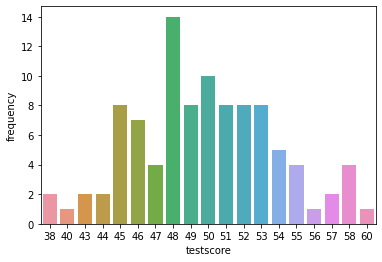

In [49]:
dataframe = test_score_distribution.DataFrame()

%matplotlib inline
# uncomment the following line if you get an module error saying seaborn not found
#!pip install seaborn==0.9.0
import seaborn

plot = seaborn.barplot(x='testscore',y='frequency', data=dataframe)

Now you know how to work with Db2 from within JupyterLab notebooks using SQL "magic"!

%%sql 

experiment with the data set provided in this notebook for practice:
SELECT country, first_name, last_name, test_score FROM INTERNATIONAL_STUDENT_TEST_SCORES;    